In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, log_loss
# sns.set(rc={'figure.figsize':(10,10)})

<Figure size 640x480 with 0 Axes>

In [2]:
param_array = pd.read_csv("parameters/parameter_array.csv").set_index("PARAM")

In [3]:
param_array

,AIRPORTS,LOOKAHEAD,DATA,CONFIG_SUPPORT,EPOCHS,NUMBER_TRIALS,PATIENCE
PARAM,,,,,,,
1,katl,1,PD,0,300,100,10
2,kclt,1,PD,0,300,100,10
3,kden,1,PD,0,300,100,10
4,kdfw,1,PD,0,300,100,10
5,kjfk,1,PD,0,300,100,10
...,...,...,...,...,...,...,...
716,kmem,12,PD_SM,1,300,100,10
717,kmia,12,PD_SM,1,300,100,10
718,kord,12,PD_SM,1,300,100,10


In [4]:
Param_Nums = []
DFs = []

Not_Finishes = []
for param in param_array.index:
    
    try:
        df = pd.read_csv(f"Results/Result_{param}/results_df.csv")
        Param_Nums.append(param)
        DFs.append(df)
        
        
    except:
        
        Not_Finishes.append(param)

    
df = pd.concat(DFs)
df["PARAM"] = Param_Nums
df = pd.merge(df, param_array, on="PARAM")

In [5]:
np.unique(df.columns)

array(['AIRPORTS', 'CONFIG_SUPPORT', 'DATA', 'EPOCHS', 'LOOKAHEAD',
       'NUMBER_TRIALS', 'PARAM', 'PATIENCE', 'Unnamed: 0',
       'config_support', 'norm_support', 'param', 'test_accuracy',
       'test_f1', 'test_loss', 'train_accuracy', 'train_f1', 'train_loss',
       'val_accuracy', 'val_f1', 'val_loss'], dtype=object)

In [6]:
pd.set_option("display.max_rows", 500)
df.groupby(["CONFIG_SUPPORT","DATA"]).mean()["train_loss"]

CONFIG_SUPPORT  DATA 
0               PD       0.099588
                PD_SM    0.069191
                SM       0.065410
1               PD       0.083665
                PD_SM    0.061075
                SM       0.059430
Name: train_loss, dtype: float64

In [7]:
pd.set_option("display.max_rows", 500)
df.groupby(["CONFIG_SUPPORT","DATA"]).mean()["val_loss"]

CONFIG_SUPPORT  DATA 
0               PD       0.099849
                PD_SM    0.091783
                SM       0.093309
1               PD       0.081763
                PD_SM    0.078344
                SM       0.079575
Name: val_loss, dtype: float64

In [8]:
pd.set_option("display.max_rows", 500)
df.groupby(["AIRPORTS","DATA"]).mean()["test_loss"]

AIRPORTS  DATA 
katl      PD       0.062462
          PD_SM    0.063553
          SM       0.065333
kclt      PD       0.121693
          PD_SM    0.111374
          SM       0.113716
kden      PD       0.092448
          PD_SM    0.086748
          SM       0.085394
kdfw      PD       0.064817
          PD_SM    0.053747
          SM       0.052395
kjfk      PD       0.158119
          PD_SM    0.180441
          SM       0.190202
kmem      PD       0.109911
          PD_SM    0.105770
          SM       0.105673
kmia      PD       0.096970
          PD_SM    0.093634
          SM       0.094782
kord      PD       0.087946
          PD_SM    0.089217
          SM       0.089666
kphx      PD       0.092055
          PD_SM    0.083857
          SM       0.083199
ksea      PD       0.105656
          PD_SM    0.145892
          SM       0.144746
Name: test_loss, dtype: float64

<AxesSubplot:xlabel='LOOKAHEAD', ylabel='config_support'>

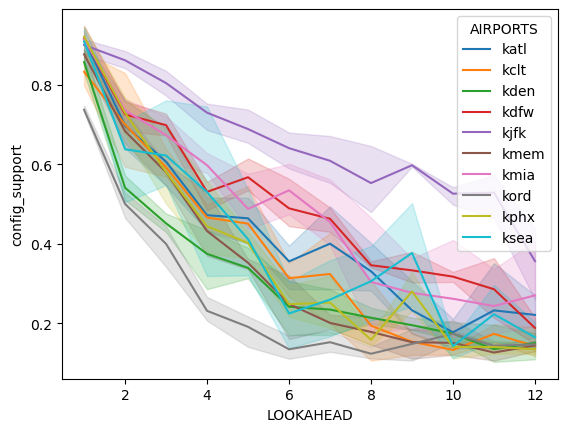

In [9]:
small_df = df[df.CONFIG_SUPPORT==1]
small_df.groupby(["AIRPORTS","LOOKAHEAD"]).mean()[["config_support","norm_support"]]

sns.lineplot(data=small_df,x="LOOKAHEAD",y="config_support",hue="AIRPORTS")

<AxesSubplot:xlabel='LOOKAHEAD', ylabel='norm_support'>

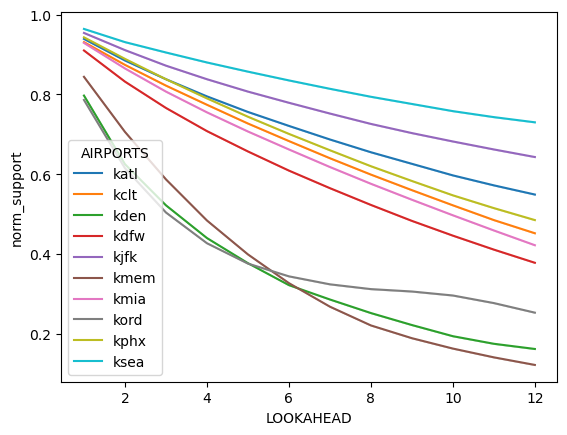

In [10]:
sns.lineplot(data=small_df,x="LOOKAHEAD",y="norm_support",hue="AIRPORTS")

In [11]:
small_df = df[df.CONFIG_SUPPORT==1]
df.groupby(["CONFIG_SUPPORT","DATA"]).mean()[["config_support","norm_support"]]

config_support  norm_support
CONFIG_SUPPORT DATA                               
0              PD          -1.000000       0.60905
               PD_SM       -1.000000       0.60905
               SM          -1.000000       0.60905
1              PD           0.436702       0.60905
               PD_SM        0.392345       0.60905
               SM           0.405259       0.60905

In [12]:
param_array.loc[Not_Finishes]

,AIRPORTS,LOOKAHEAD,DATA,CONFIG_SUPPORT,EPOCHS,NUMBER_TRIALS,PATIENCE
PARAM,,,,,,,


# Best Configuration of Data

In [13]:
results_df = df[(df.CONFIG_SUPPORT == 1) & (df.DATA == "PD_SM")]

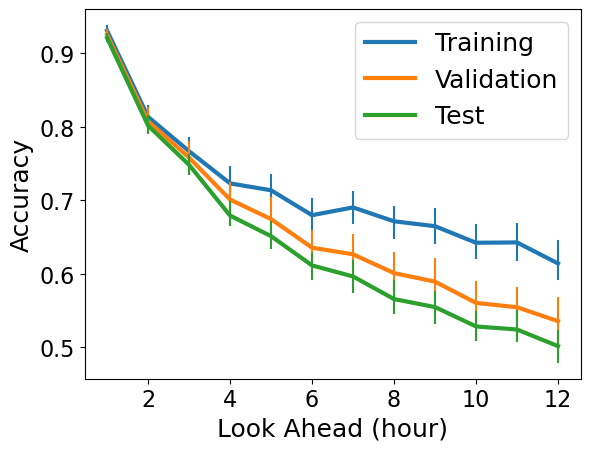

In [14]:
sns.lineplot(data=results_df, x="LOOKAHEAD", y="train_accuracy", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df, x="LOOKAHEAD", y="val_accuracy", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df, x="LOOKAHEAD", y="test_accuracy", err_style="bars", ci=30, linewidth=3)
plt.legend(["Training", "Validation", "Test"], fontsize=18)
plt.xlabel("Look Ahead (hour)", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.savefig('figures/Acc_vs_Lookahead.png')

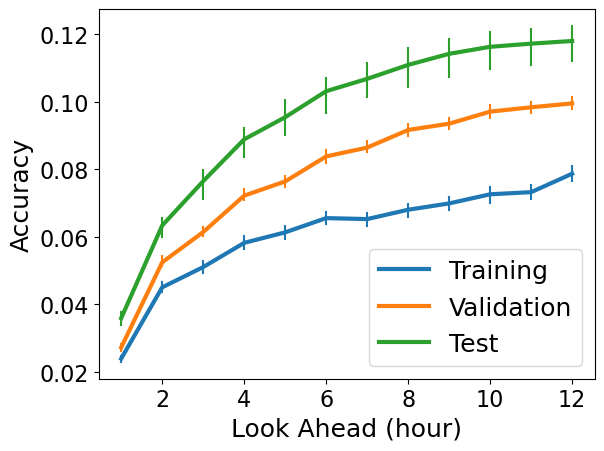

In [15]:
sns.lineplot(data=results_df, x="LOOKAHEAD", y="train_loss", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df, x="LOOKAHEAD", y="val_loss", err_style="bars", ci=30, linewidth=3)
sns.lineplot(data=results_df, x="LOOKAHEAD", y="test_loss", err_style="bars", ci=30, linewidth=3)
plt.legend(["Training", "Validation", "Test"], fontsize=18)
plt.xlabel("Look Ahead (hour)", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.savefig('figures/Acc_vs_Lookahead.png')

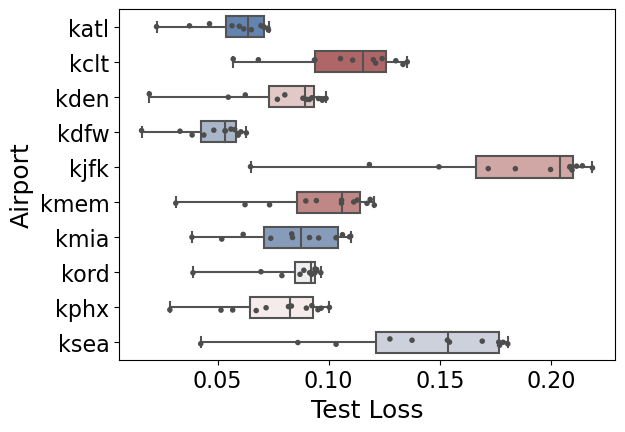

In [22]:

pal = sns.color_palette("vlag", 10)
pal = np.array(pal)
inds = np.array([0,9,6,2,7,8,1,4,5,3])
pal = pal[inds]
sns.boxplot(data=results_df, x="test_loss", y="AIRPORTS", whis=[0, 100], width=.6, palette=pal)
sns.stripplot(data=results_df, x="test_loss", y="AIRPORTS", size=4, color=".3", linewidth=0)
plt.xlabel("Test Loss", fontsize=18)
plt.ylabel("Airport", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('figures/Loss_vs_Airport.pdf')

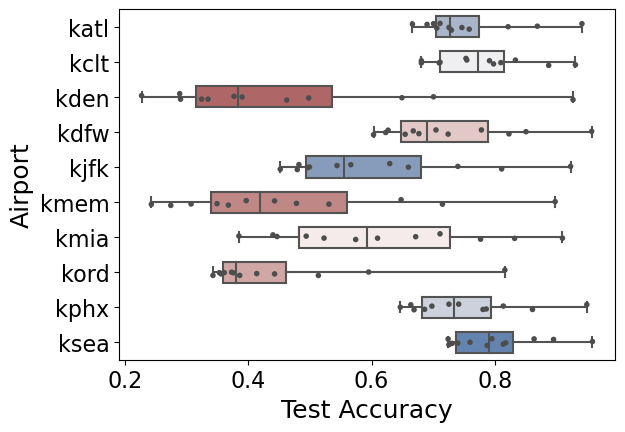

In [23]:
pal = sns.color_palette("vlag", 10)
pal = np.array(pal)
inds = np.array([3,5,10,7,2,9,6,8,4,1])-1
pal = pal[inds]
sns.boxplot(data=results_df, x="test_accuracy", y="AIRPORTS", whis=[0, 100], width=.6, palette=pal)
sns.stripplot(data=results_df, x="test_accuracy", y="AIRPORTS", size=4, color=".3", linewidth=0)
plt.xlabel("Test Accuracy", fontsize=18)
plt.ylabel("Airport", fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('figures/Acc_vs_Airport.pdf')

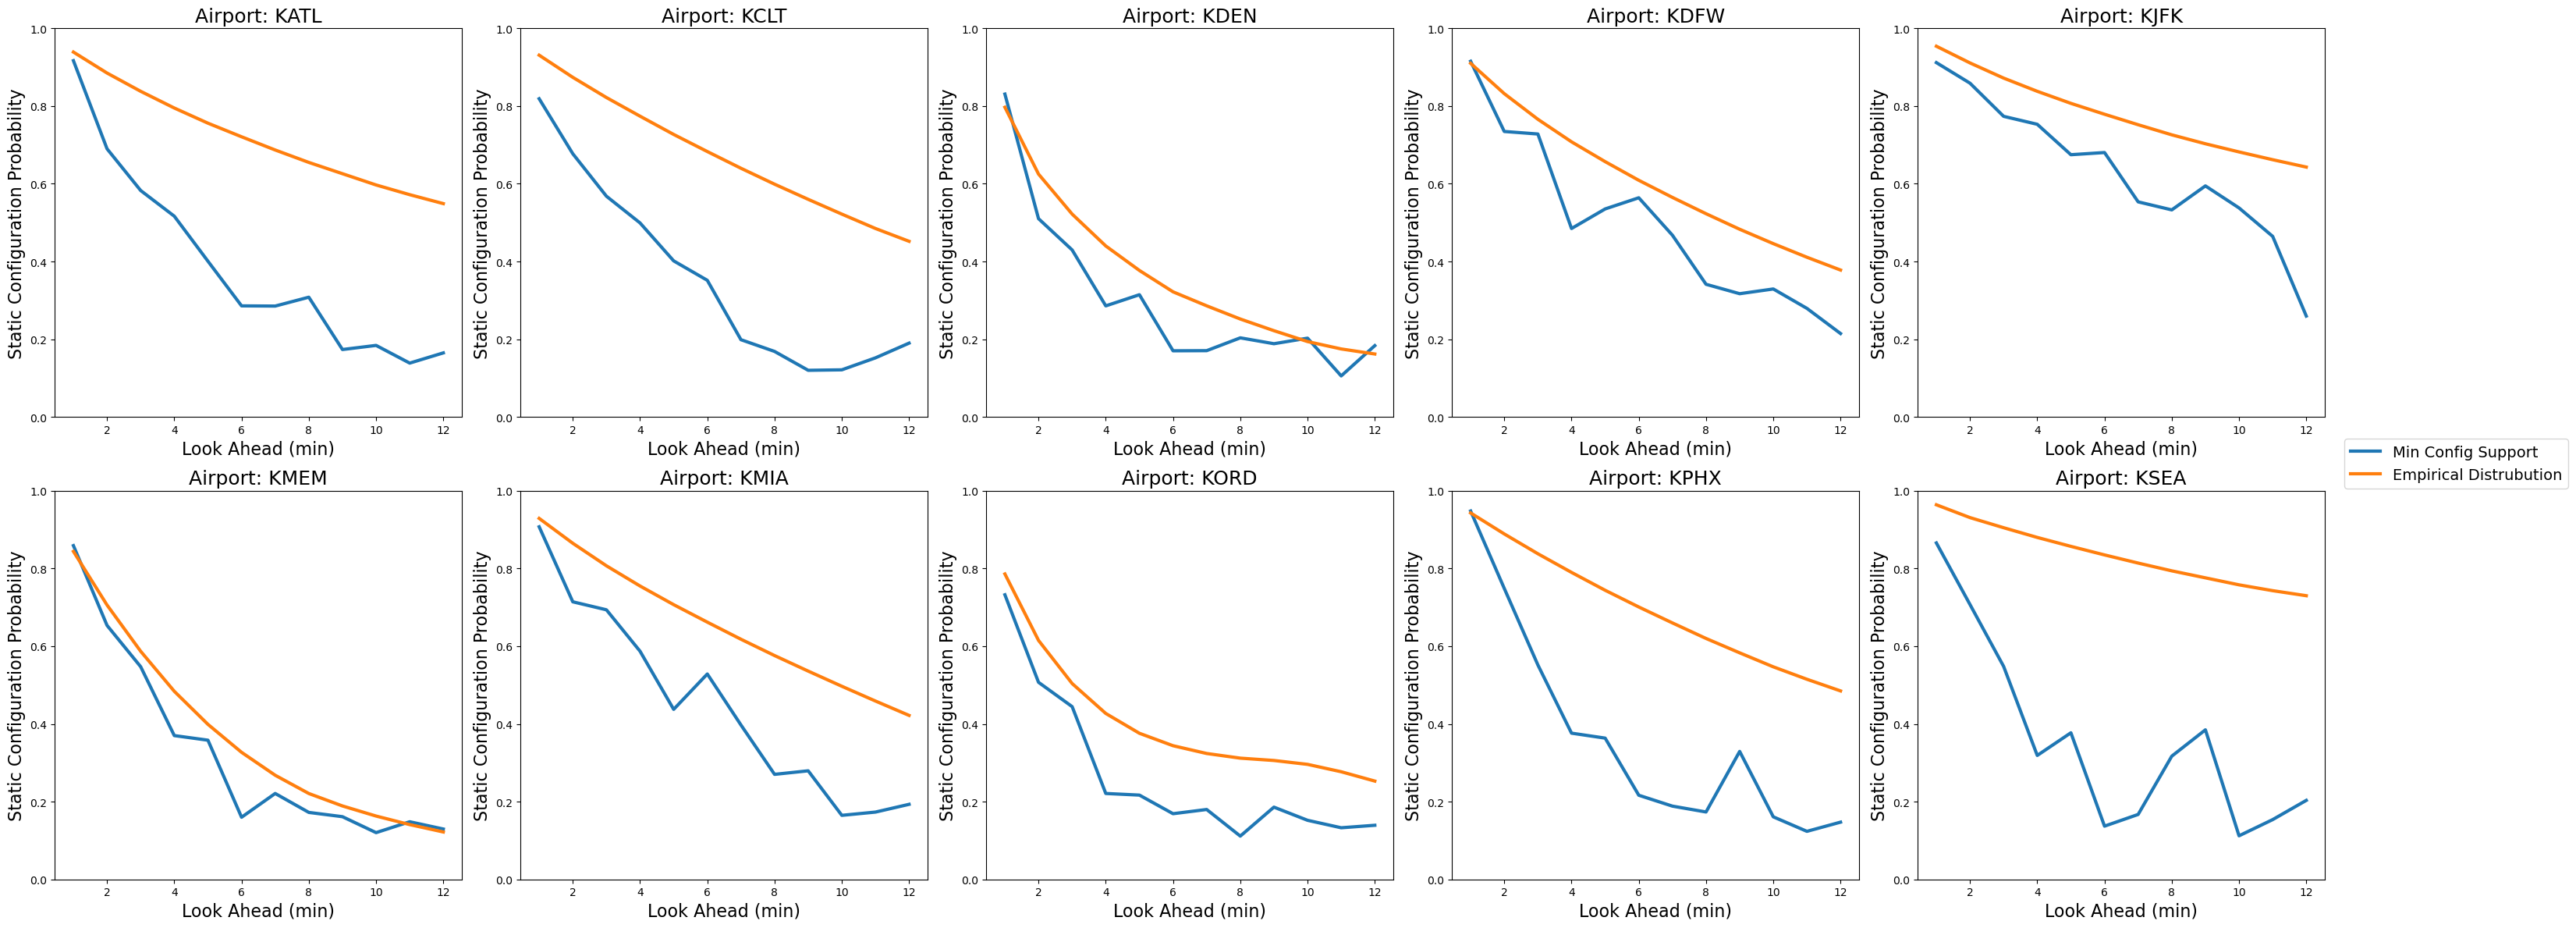

In [18]:
fig, axs = plt.subplots(nrows=2,ncols=5, figsize=(30,12))

AIRPORTS = np.unique(results_df.AIRPORTS)
for i, airport in enumerate(AIRPORTS):
    col_idx  = int(i%5)
    row_idx = int(np.floor(i/5))
    airport_df = results_df[(results_df.AIRPORTS==airport)]

    
    axs[row_idx,col_idx].plot(airport_df.LOOKAHEAD, airport_df.config_support, linewidth=3)

    support_defaults = airport_df.norm_support
    look_aheads = airport_df.LOOKAHEAD

    axs[row_idx,col_idx].plot(look_aheads, support_defaults, linewidth=3)


    axs[row_idx,col_idx].set_ylim([0,1])
    axs[row_idx,col_idx].set_title(f"Airport: {airport.upper()}", fontsize=18)
    axs[row_idx,col_idx].set_xlabel("Look Ahead (min)", fontsize=16)
    axs[row_idx,col_idx].set_ylabel("Static Configuration Probability", fontsize=16)
    fig.tight_layout()

fig.legend(["Min Config Support", "Empirical Distrubution"], fontsize=14, loc="center left", bbox_to_anchor= (1,0.5))
plt.savefig('figures/Dist_vs_AiportLookahead.pdf')